# Cyclus parameter fidelity assessment tool

This tool is designed to help users understand the behavior of Cyclus archetypes.

In [1]:
import subprocess

import cymetric as cym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (40,24)
from cymetric import graphs as cgr
from cymetric import timeseries as tm
from cymetric import filters as fl

Enter two file paths to compare: 
(expand this later?)

In [2]:
infile1 = "candu_one_day.py"
infile2 = "candu_one_month.py"

In [3]:
#process1 = subprocess.run(['cyclus', infile1, '-o', 'candu_one_day.sqlite'], stdout=subprocess.PIPE)

# with open('candu_one_day.log', 'w') as f:
#     print(process1.stdout.decode('utf-8'))
#     f.write(process1.stdout.decode('utf-8'))

In [4]:
#process2 = subprocess.run(['cyclus', infile2, '-o', 'candu_one_month.sqlite'], stdout=subprocess.PIPE)

# with open('candu_one_month.log', 'w') as f:
#     print(process2.stdout.decode('utf-8'))
#     f.write(process2.stdout.decode('utf-8'))

In [5]:
outfile1 = "candu_one_day.sqlite"
db = cym.dbopen(outfile1)
ev = cym.Evaluator(db=db, write=True)

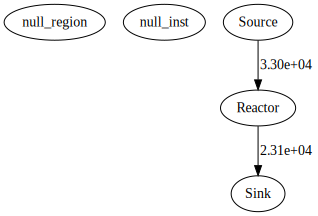

In [6]:
cym.graphs.flow_graph(ev, label = "mass")

In [7]:
outfile2 = "candu_one_month.sqlite"
db2 = cym.dbopen(outfile2)
ev2 = cym.Evaluator(db=db2, write=True)

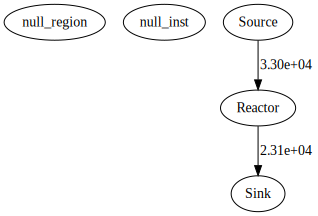

In [8]:
cym.graphs.flow_graph(ev2, label = "mass")

In [11]:
outfile3 = "candu_unscaled.sqlite"
db3 = cym.dbopen(outfile3)
ev3 = cym.Evaluator(db=db3, write=True)

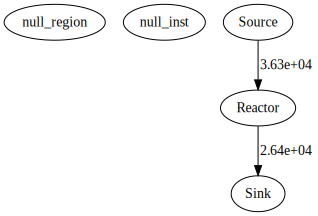

In [12]:
cym.graphs.flow_graph(ev3, label = "mass")

In [23]:
day_quantities = []
for i in range(4320): 
    subset = ev.eval("ExplicitInventory", conds = [("Time", "==", i)])
    day_quantities.append(sum(subset["Quantity"]))

month_quantities = []
for i in range(144):
    subset = ev2.eval("ExplicitInventory", conds = [("Time", "==", i)])
    month_quantities.append(sum(subset["Quantity"]))
    
unscaled_quantities = []
for i in range(144):
    subset = ev3.eval("ExplicitInventory", conds = [("Time", "==", i)])
    unscaled_quantities.append(sum(subset["Quantity"]))

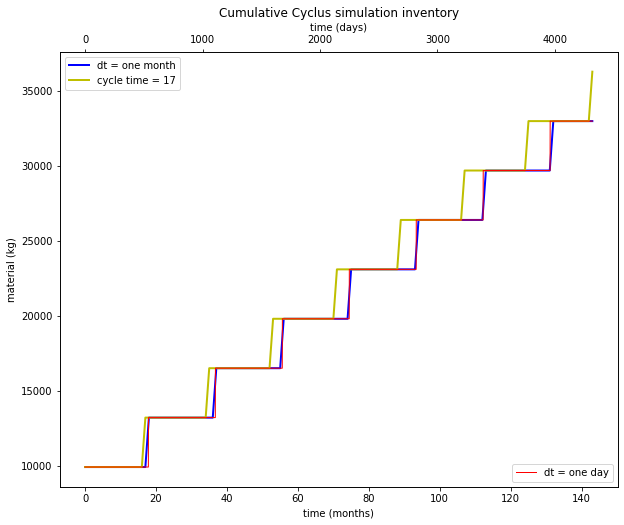

In [39]:
fig, ax1 = plt.subplots(figsize = (10,8))

ax1.plot(range(144), month_quantities, color = "b", linewidth = 2.0, label = "dt = one month")
ax1.plot(range(144), unscaled_quantities, color = "y", linewidth = 2.0, label = "cycle time = 17")
ax1.set_xlabel("time (months)")
ax1.set_ylabel("material (kg)")
ax1.legend(loc = "upper left")

ax2 = ax1.twiny()
ax2.plot(range(4320), day_quantities, color = "r", linewidth = 1.0, label = "dt = one day")
ax2.set_xlabel("time (days)")

plt.title("Cumulative Cyclus simulation inventory")
plt.legend(loc='lower right') 

plt.show()